In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.cm import get_cmap

In [3]:
# path to raw data
file_path = r'data/full_dataset'

# path to json file describing data
json_file_path = r'/home/ben/reef-audio-representation-learning/data/dataset.json'

/tmp/ipykernel_66606/2556982766.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20b', len(all_classes))


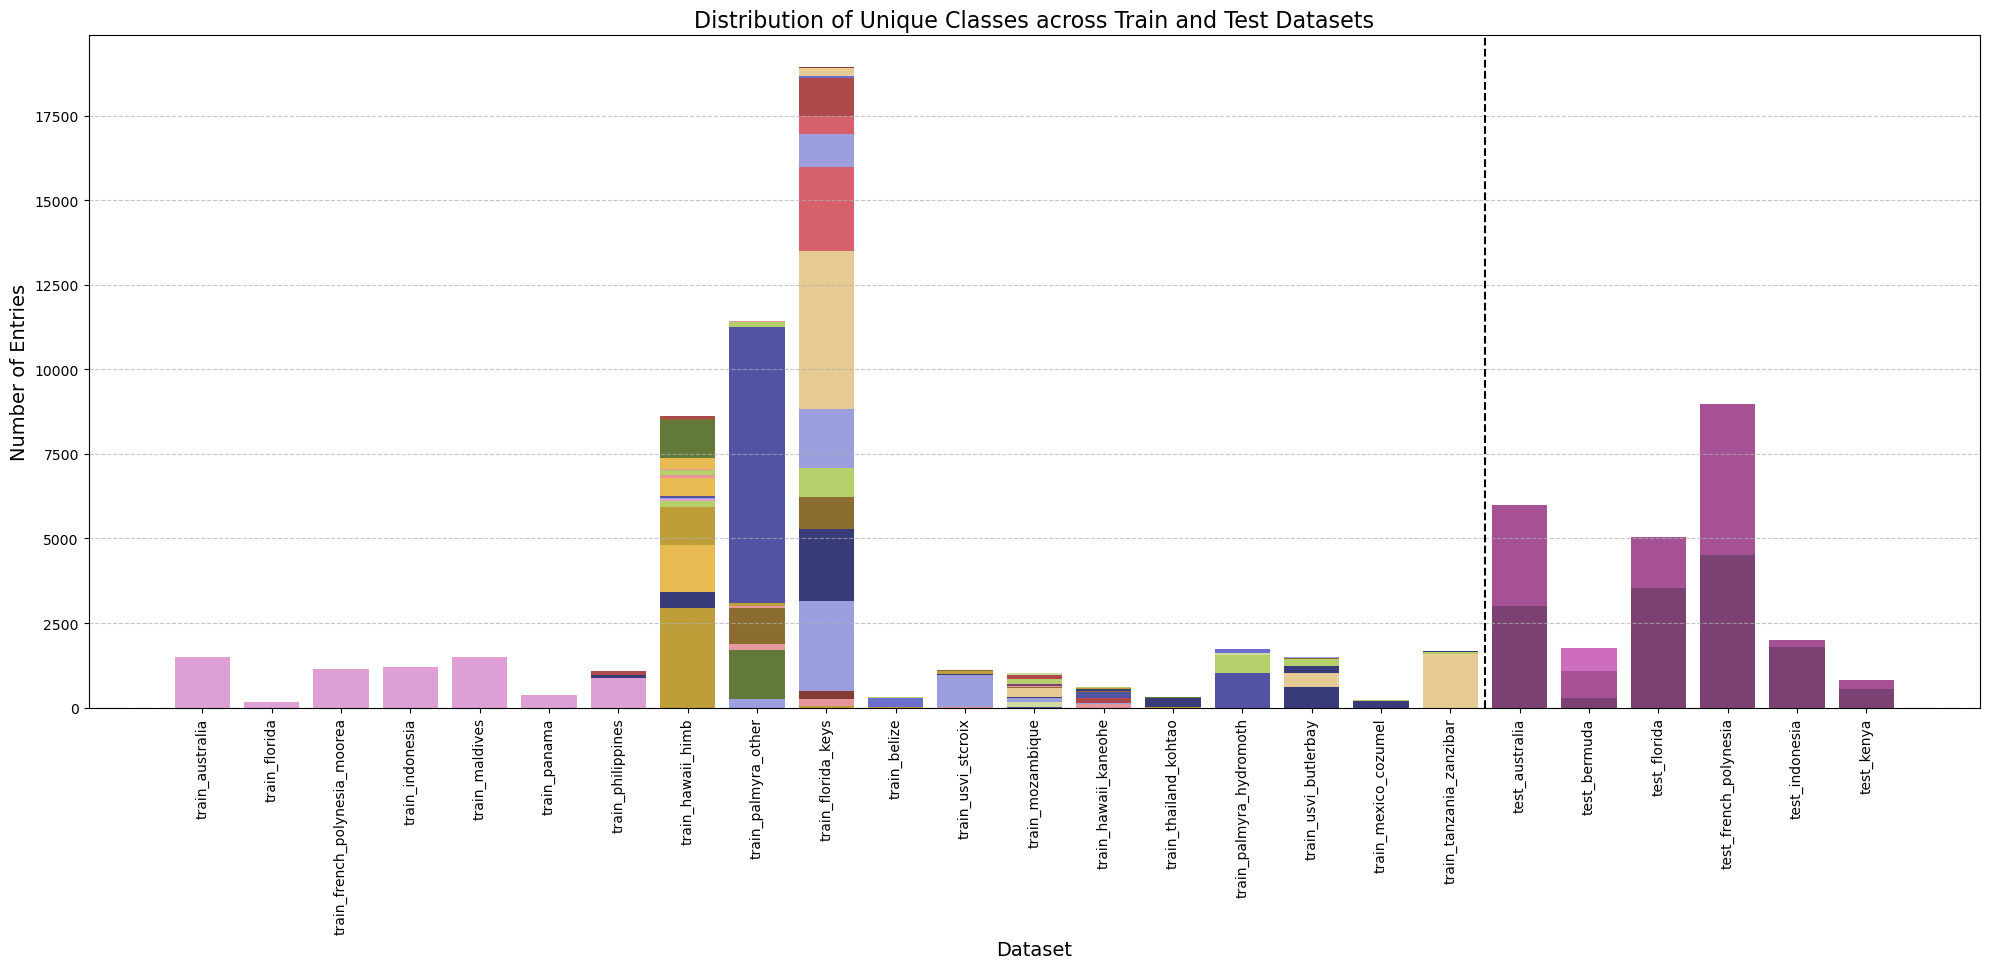

In [4]:
# Read the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Extract the key containing the data entries
data_key = list(data.keys())[0]
data_entries = data[data_key]

# Grouping the data by "dataset," "data_type," and then by "class" or "annotation_class"
stacked_grouping = {'train_data': {}, 'test_data': {}}
all_classes = set()

for entry in data_entries:
    dataset = entry['dataset']
    data_type = entry['data_type']
    data_class = entry['class'] if 'class' in entry else None
    annotation_class = entry['annotation_class'] if 'annotation_class' in entry else None
    class_key = data_class or annotation_class or 'unknown'
    all_classes.add(class_key)
    
    if dataset not in stacked_grouping[data_type]:
        stacked_grouping[data_type][dataset] = {}
    stacked_grouping[data_type][dataset][class_key] = stacked_grouping[data_type][dataset].get(class_key, 0) + 1

# Function to plot stacked bars representing the counts of unique classes within each dataset
def plot_stacked_counts(data_grouping, offset, color_palette):
    for i, (dataset, class_counts) in enumerate(data_grouping.items()):
        bottom_value = 0
        for class_key, count in class_counts.items():
            plt.bar(i + offset, count, bottom=bottom_value, color=color_palette[class_key])
            bottom_value += count

# Creating a consistent color palette for classes (colors will be reused across datasets)
cmap = get_cmap('tab20b', len(all_classes))
color_palette_consistent = {class_key: cmap(i) for i, class_key in enumerate(sorted(all_classes))}

# Concatenating train and test labels
all_labels = list(stacked_grouping['train_data'].keys()) + list(stacked_grouping['test_data'].keys())

# Creating the plot
plt.figure(figsize=[20, 10])

# Plotting train data with an offset of 0
plot_stacked_counts(stacked_grouping['train_data'], 0, color_palette_consistent)

# Plotting test data with an offset equal to the number of train datasets
plot_stacked_counts(stacked_grouping['test_data'], len(stacked_grouping['train_data']), color_palette_consistent)

# Adding a dashed line to separate train and test datasets
plt.axvline(x=len(stacked_grouping['train_data']) - 0.5, color='black', linestyle='--')

# Adding labels, title
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Number of Entries', fontsize=14)
plt.title('Distribution of Unique Classes across Train and Test Datasets', fontsize=16)
plt.xticks(ticks=range(len(all_labels)), labels=all_labels, rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout
plt.tight_layout(rect=[0, 0.02, 1, 1]) # Making room for the x-axis labels
plt.show()
